<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/ML_For_DS/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri Bilimi için Makine Öğrenmesi 2

# Doğrusal Regresyon ve Kuzenleri

İşleyeceğimiz konu başlıkları:
1. Basit Doğrusal Regresyon
2. Çoklu Doğrusal Regresyon
3. Temel Bileşen Regresyonu (PCR)
4. Kısmi En Küçük Kareler Regresyonu (PLC)
5. Ridge Regresyonu
6. Lasso Regresyonu
7. Elastic Net Regresyonu (PCL-PCR mixed)
* Her Model için yapacağımız şeyler, regrsyonda da sınıflandırmada da:
    * Model oluşturma, teorisini öğreneceğiz
    * Tahmin
    * Model Optimizasyonu (model tunning)

<br> <br> 
Doğrusallıkta kalmak bize yorumlanabilirlik açısından daha kolaylık sağlamaktadır. Bu yüzden doğruallık her zaman tercih edilir. Mantık yürüterek bulabileceğin gibi: Yorumlanmaya en açık modeller doğrusal olanlardır. Tabi bu güzelliğin yanında bazı zorlukarda beraberinde getirmiştir, bazı varsayımlar ile uğraştırır.

## Basit Doğrusal Regresyon

### Teori:

Temel amaç, bağımlı ve bağımsız değişken arasındaki iişkiyi ifade den doğrusal fonksiyonu bulmaktır. Y bağımlı,x bağımsız değişken olur. Y değişkeni X'e bağlı değiştiği için bağımlı değişken adını almıştır. Ayrıca bizim bulmak istediğimiz değişkende kendisidir. <br>
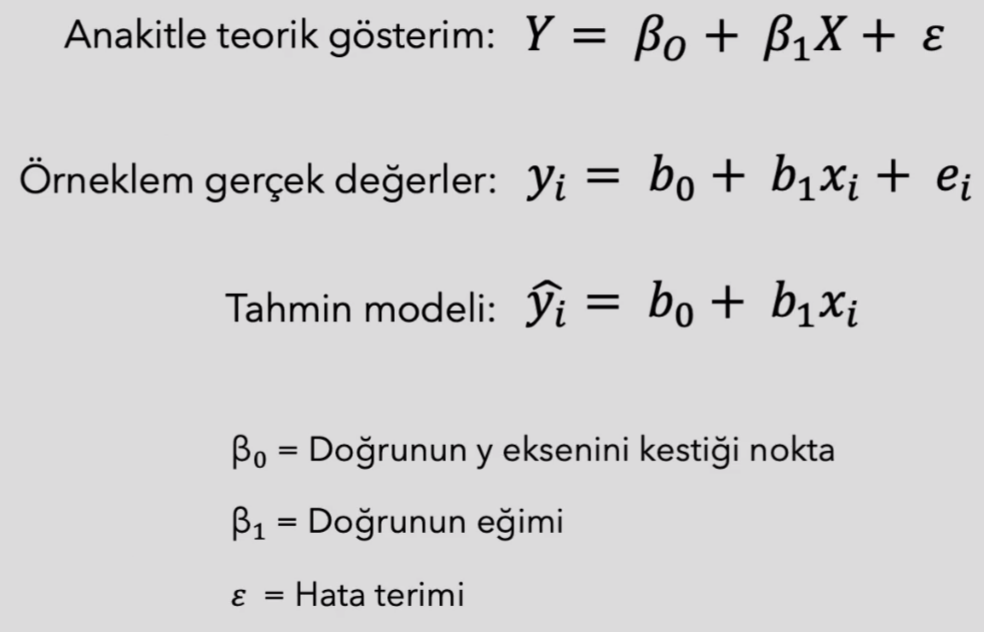

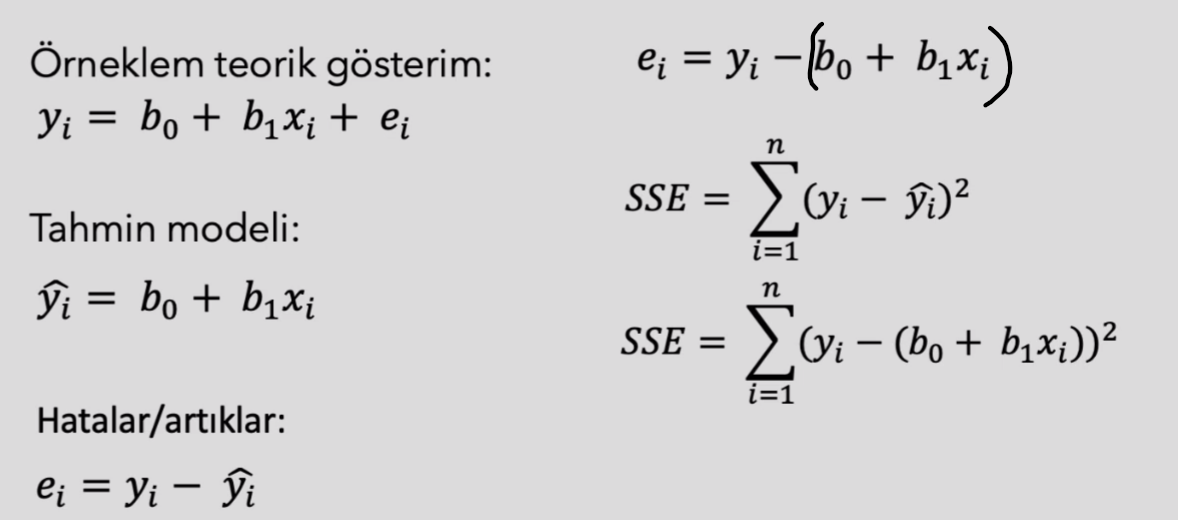

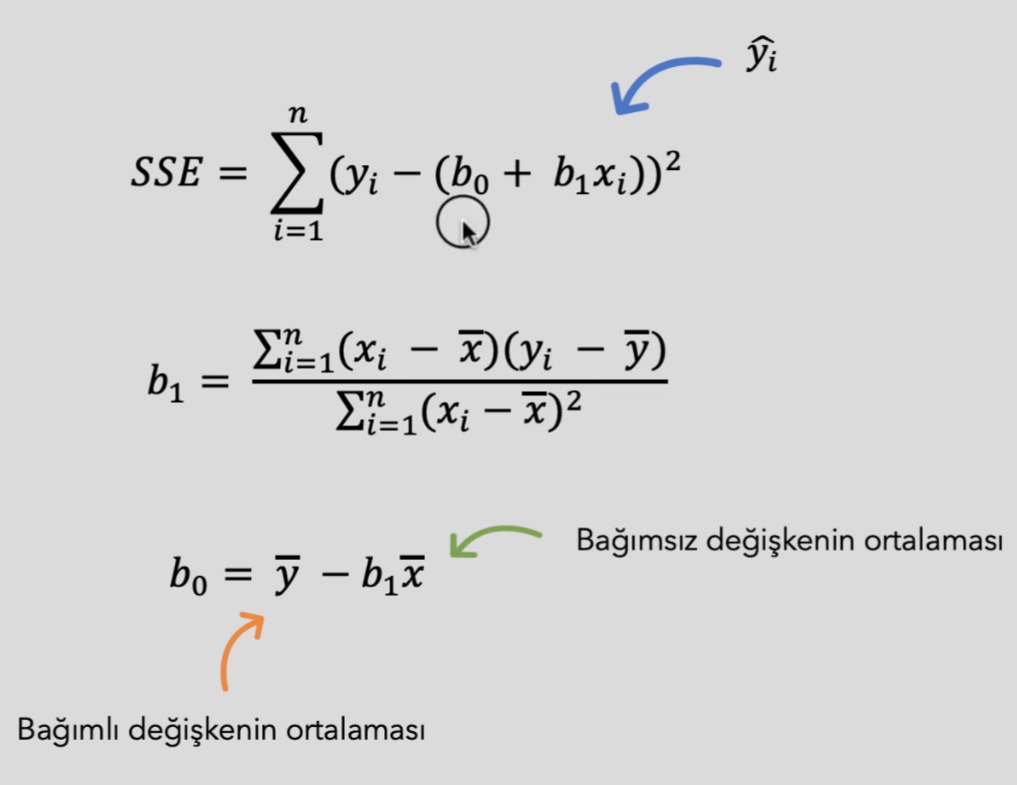

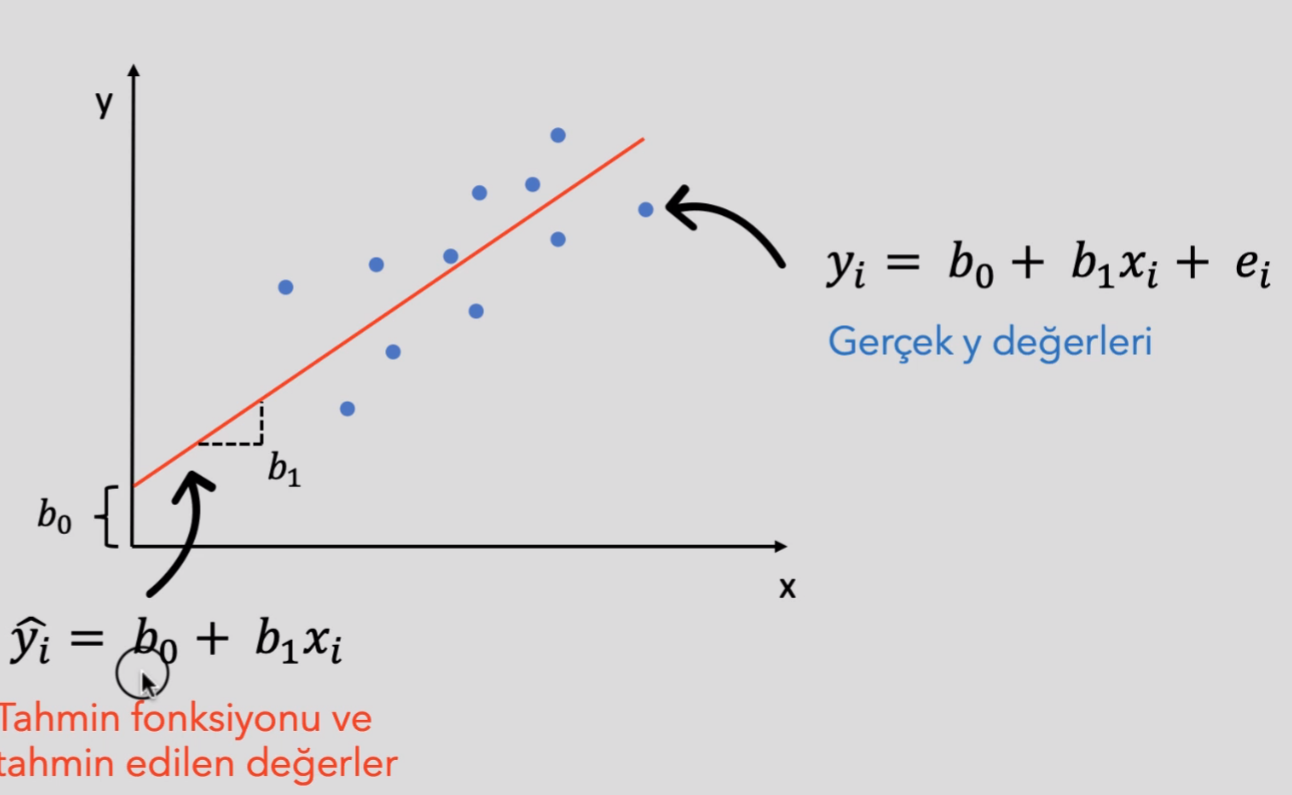

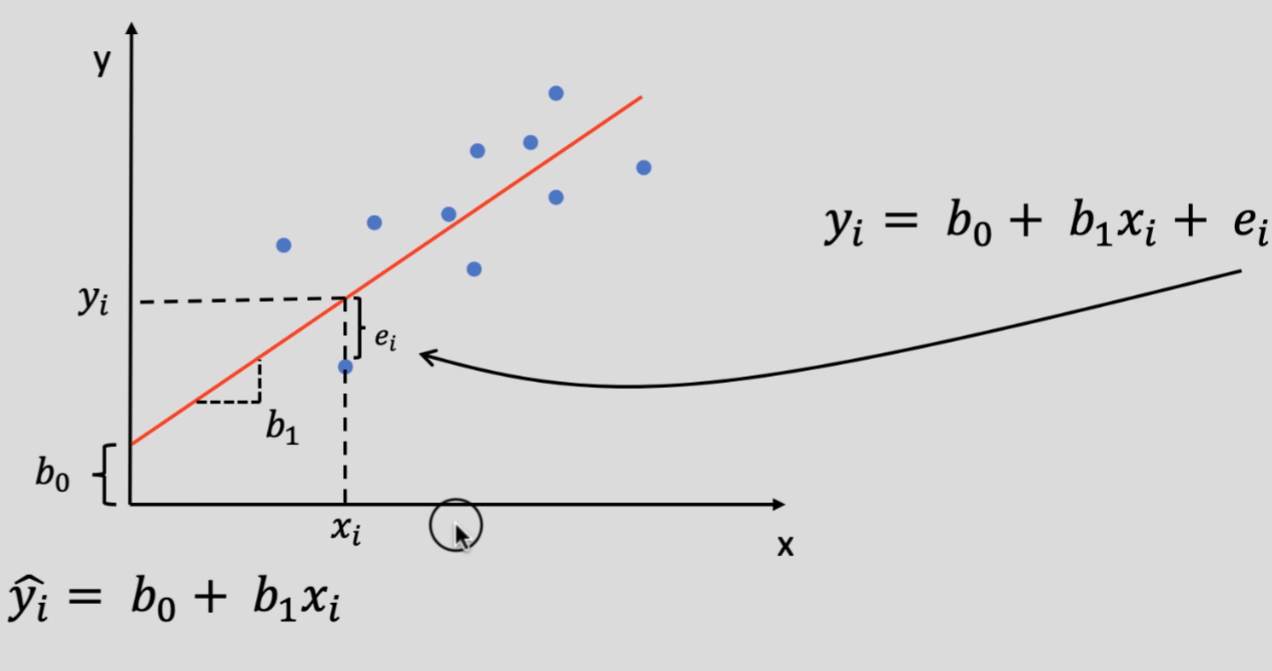

### Uygulama:

#### 1. Model

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Data Science/Kendi Yazılarım/Advertising.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# exceldeki index işimize yaramaycak, yer kaplamasın diye siliyorum. Axis 1, sütun oluyor.
dataset.drop("Unnamed: 0", inplace = True, axis =1)
dataset.head()

'''
Silmenin daha cool yolu:
df = df.iloc(:,1:len(df))
(satır,sütun)

ayrıca  dosyayı okurken kullanmak istediğin kolonları da seçebilirsin.
dataset = pd.read_csv("../Advertising.csv", usecols=[1,2,3,4])
'''

'\nSilmenin daha cool yolu:\ndf = df.iloc(:,1:len(df))\n(satır,sütun)\n\nayrıca  dosyayı okurken kullanmak istediğin kolonları da seçebilirsin.\ndataset = pd.read_csv("../Advertising.csv", usecols=[1,2,3,4])\n'

In [7]:
dataset.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# ilk yapacağın hareket, sakın unutayım deme...
df = dataset.copy()

In [9]:
df.isnull().values.any()

False

In [10]:
# değişkenlerin korelasyonlarını inceleyelim.
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Burada yorum yaparsak:
* Tv'nin satışla %78'lik pozitif yönde ilişkisi var
* Radyonun satışla %57'lik pozitif yönde ilişkisi var
* Gazatenin satışla %22'lik pozitif yönde ilişkisi var

Burada sales değişkenini bağımlı değişken kabul edersek en anlamlı ve en etki düzeyi yüksek olan değişken Tv değişkenidir. Tv'ye yatırım yaparlarsa satışların artması daha kuvvetle ihtimal olası olur. <br> <br>

Tv'yi cebe attık, Radio peki kullanılabilir mi? Baktığımızda neredeyse %60 civarlarında, normalde ok. Fakat radio satışlarını TV arttırmış olabilir mi sorusunu sormak gerekir. Eğer TV arttırdıysa sadece TV'ye para yatırmak daha mantıklı olur. Fakat değilse, ikisinide arttırabiliriz. Baktığımızda TV-Radio korelasyonu çok az, o zaman radio kendisi tek başına %57'lik satışa sahip (gazateyi daha incelemedikde sen anladın). O zaman satışları arttırmak için radioya da para yatırılabilir.

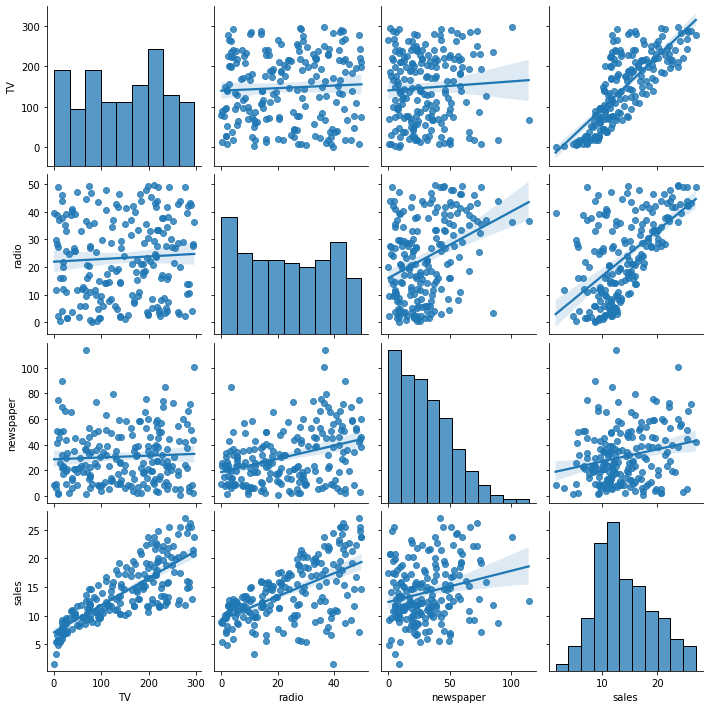

In [11]:
## bu durumları birde görsele dökelim
import seaborn as sns
sns.pairplot(df, kind="reg")

Dikkat edersen gazatenin sola yatık dağıldığını decribe^tan yaptığın gibi buradan da yapabilirsn. Satışlar ile reklam kanallarımız arasındaki ilişkileri yorumlayalım.

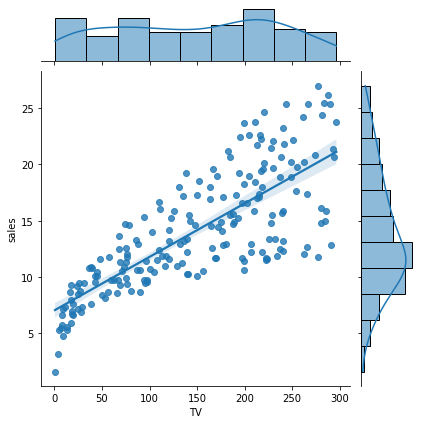

In [12]:
#TV harcamaları ile satışlar arasındaki ilişkiye odaklanalım
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

Yukarıda ve sağda verilen dağılım grafikleri anlayacağın üere biri sales'ın biri TV'nin. TV iki başlı gibi duruyor. Sales ise çok güzel dağılmış.

In [13]:
# şimdi modellemey başlayalım :) stats kütüphanesi ile yapacağız
import statsmodels.api as sm

In [14]:
X = df[["TV"]] # bağımlı değişken
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
#aslında şuan elimizde bir tür list var tek boyutlu, matris işlemleri için bunun en az 2 boyutlu olması gerekir.
#Bu yüzden 2. boyut için etkisiz eleman ekliyoruz.
#burada ekleyeceğimiz olan 1 değişkenleri, bize fonksiyondaki sabiti verecek (intercent_)
X = sm.add_constant(X) 
X[0:5]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [16]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
lm = sm.OLS(y,X) #lm, linear model kısaltılması. Şuan ilk modelimizi oluşturduuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuk

In [18]:
model = lm.fit() # fitliyoruz bildiğin gibi

Not: fitlenmiş modelin detayları için statsmodel kullanıyoruz. Scikit learn ne kadar geniş model imkanı tanısada istatiksel detaylarda bir data scientist için yetersiz kalıyor.

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        20:06:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Açıklamalar: <br>
* R-squared: Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Yani TV değişkeni, sales değişkenindeki değişikliğin sebebinin %61.2'sini açıklayabilmektedir. Eğer biz hem TV hem radyoyu mış olsaydık, %61 deperini ikisi için sağlıyor derdik.
* Adj. R-squared: Yukarıdakinin alternaifidir. Karesel ilerlemede, başka değerlerde işin içine girince bir şişme gözükebilir R-squared'da. Bu yüzden alternatif oalrak Adj. R-squared geliştirmiştir. İkisi birbirine yakınsa no problem. Eğer R-squared çok şişmiş ise Adj. R-squared'ı ele almak daha doğru olur.
* F-statistic: modelin anlamlılığının anlaşılması için kurulan Test istatistiğidir. "Modeli kurduk, sonucu aldık ama model anlamlı mı?" cevabının yanıtıdır.
* Prop (F-Statistic): Modelin "p value" değeridir. F-statistic ile beraber incelendiğinde modlin anlamlılık düzeyi hakkında yorum verir.
* AIC-BIC: Model karşılaştırmada kullanılan iki değerdir.
* Skew: Çarpıklık değeridir. Sıfıra ne kadar yakınsa o kadar iyidir.
* Kurtosis: Basıklık katasyısıdır. Üç civarlarında olması iyidir. 

In [20]:
# statsmodels.api ile görmüştük. Birde statsmodels.formula.api ile görelim
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        20:06:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gördüğün üzere, sonuç aynı. Farklı bir yazım stilini görmüş olduk burada ("sales ~ TV"). <br>
Yukarıda tüm tablo çıktısını ele aldık, eğer teker teker ya da ihtiyaç duyduğun şeyleri nasıl çekebileceğine bakalım:

In [21]:
# Intercept(sabit) ve coef(bağımsız değişken) değerlerini çekme 
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Sat, 11 Feb 2023",Prob (F-statistic):,1.47e-42
Time:,20:06:49,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [24]:
model.summary().tables[2]

Omnibus:,0.531,Durbin-Watson:,1.935
Prob(Omnibus):,0.767,Jarque-Bera (JB):,0.669
Skew:,-0.089,Prob(JB):,0.716
Kurtosis:,2.779,Cond. No.,338.


In [25]:
# katsayıların güven aralıkalrına ulaşma
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [26]:
# modlein anlamlılığına dair bilgilere ilişmek için, p value
model.f_pvalue

1.4673897001947095e-42

In [27]:
print("f_pvalue: ","%.3f" % model.f_pvalue) # ortadaki %, sağı yazılaları ola bağlıyor

f_pvalue:  0.000


In [28]:
# f istatistiği
model.fvalue

312.1449943727128

In [29]:
print("F istatistiği: ","%.4f" % model.fvalue)

F istatistiği:  312.1450


In [30]:
# 'parametre anlamlılığına dair bilgilere erişmek'ten devammm: t value değerleri
model.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [31]:
# sadece modelin anlamlılığına ilişkin 
model.mse_model

3314.6181668686486

In [32]:
# r2 değeri (hatırlarsan bağımsız değişkenin bağımlı deişkeni açıklayabilme gücüydü)
print("r2: ", model.rsquared)
print("r2_adj: ", model.rsquared_adj)

r2:  0.611875050850071
r2_adj:  0.6099148238341623


In [33]:
# modelinn tahmin ettiği verilere erişelim:
model.fittedvalues[0:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [34]:
#gerçek değerleri hatırlarsan "y" değişkeninde tutmuştuk
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [35]:
# modelin matematikel formu 
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


İşteeee geldik işin sonlarına. Biz veri bilimcilerin olayı budur: makine öğrenmesi modelleri ile yukarıdaki gibi fonksiyonel yapılar, karar kuralları (karar ağaçları) ile gelişmiş ya da basit modelleme teknikleri ile elimizde henüz sonucu gözlenmemiş bir olayın sonucunu merak ettiğimizde, bu merakı gidermek için gözlenmiş olayları kullanarak gözlenmemiş/ merak ettiğimz olayların sonuçlarına dair tahmin edilen verileri elde etmiş oluyoruz. Geleceği bu şekilde buluyoruz...

Matematiksel formu gayet güzel ama sunum yaparken görsel materyal her zaman daha iyi anlaşılmasına yol açar. Ekleyelim:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

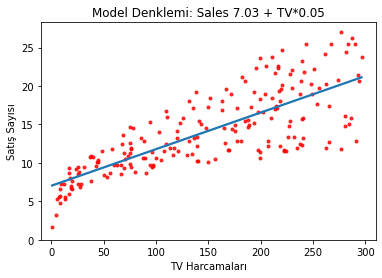

In [36]:
g = sns. regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color":"r","s":9})
g.set_title("Model Denklemi: Sales 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları") 
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0)

buraya kadar statsmodel.api ile gördük. Şimdide scikitlearn ile görelim. Scikitlearn, makine öğrenmesi konusunda fazlaca kütüphaneye sahip olan, çoğu ML algortmasına sahip bir bir frameworktür. Denetimli, denetimsiz öğrenme türleri vardır. Parametrik ve non parametrik testleri de vardır.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
from pandas.core.internals.managers import libinternals
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
print(model.intercept_)
print(model.coef_)

7.032593549127695
[0.04753664]


In [39]:
# r2 değeri
model.score(X,y)

0.611875050850071

In [40]:
# tahmin edilen değerlere erişmek için:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

#### 2. Tahmin

Model Denklemimiz: <br>
Sales = 7.03 + TV*0.04 <br>
Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [41]:
7.03 + 30*0.04

8.23

In [42]:
# tahmin üretelim
x = df ["TV"]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
# vereceğimiz değeri gidip yukarıda yazacak. Bizimkinden farklı olmasının sebebi virglden sonra biz adece 2 basamak aldık.
print(model.predict([[30]]))

[8.45869276]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
# diyelimki 3 farklı departmandan veri geldi. 
yeni_veri = [[5],[90],[200]]
print(model.predict(yeni_veri)); # liste halinde her bir değeri tahmin etmeişlemini gerçekleştirdik.

[ 7.27027675 11.31089119 16.53992164]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Makine Öğrenmsinde Artıkların Önemi

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
reg = LinearRegression()
model = reg.fit(X,y)

In [46]:
# ilki test  y değeri, ikincisi tahmin edilen y değerleri
mse = mean_squared_error(y,model.predict(X))

In [47]:
#gerçek değerler ile tahmin edilen değerlerin çıkarılıp karelerinin alınıp toplandıktan sonra adet sayısına böünmesiyle oluşan mse sonucumz:
mse

10.512652915656757

In [48]:
# birde rmse değerimizi bulalım
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [49]:
# tahmin edilen değerler
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

Dipnot: predict yapabilmemiz için önce zorunlu olarak fitlememiz gerekiyor.

In [50]:
# gerçek değerler
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [51]:
# karşılaştırma dataframe'i oluturalım
k_t = pd.DataFrame({"gercek_y:": y[0:10],
                    "tahmin_y": reg.predict(X)[0:10]
                    })
k_t

,gercek_y:,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [52]:
k_t["gercek-tahmin"] = k_t["gercek_y:"] - k_t["tahmin_y"]

In [53]:
k_t

,gercek_y:,tahmin_y,gercek-tahmin
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [54]:
k_t["(g-t)^2"] = k_t["gercek-tahmin"]**2

In [55]:
k_t

,gercek_y:,tahmin_y,gercek-tahmin,(g-t)^2
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [56]:
k_t["abs_e"] = abs(k_t["gercek-tahmin"])

In [57]:
k_t

,gercek_y:,tahmin_y,gercek-tahmin,(g-t)^2,abs_e
0,22.1,17.970775,4.129225,17.050503,4.129225
1,10.4,9.147974,1.252026,1.567569,1.252026
2,9.3,7.850224,1.449776,2.101851,1.449776
3,18.5,14.234395,4.265605,18.195390,4.265605
4,12.9,15.627218,-2.727218,7.437719,2.727218
5,7.2,7.446162,-0.246162,0.060596,0.246162
6,11.8,9.765950,2.034050,4.137358,2.034050
7,13.2,12.746498,0.453502,0.205664,0.453502
8,4.8,7.441409,-2.641409,6.977040,2.641409
9,10.6,16.530414,-5.930414,35.169814,5.930414


In [58]:
print("Toplam hata(abs ile):", np.sum(k_t["abs_e"]),
      "Toplam hata(karesel)", np.sum(k_t["(g-t)^2"])
      )

Toplam hata(abs ile): 25.129388421137904 Toplam hata(karesel) 92.90350329638102


In [59]:
print("Hata ortalamam (abs sonucu):",np.mean(k_t["abs_e"]),   # bunun mse olduğunu anlamışsındır.
      "Hata ortalamam (karesel sonucu):",np.mean(k_t["(g-t)^2"])
      )

Hata ortalamam (abs sonucu): 2.5129388421137904 Hata ortalamam (karesel sonucu): 9.290350329638102


In [60]:
print("rmse: ",np.sqrt(np.mean(k_t["(g-t)^2"])))

rmse:  3.048007599996775


Makine öğrenmesinde bu hatalar ile belirli parametreler bulur ve yorumlarız. <br> <br>
Yapay sinir ağlarında ise bu artıklar bir cezaya uygulanır ve tekrardan ağa dağıtılır, hatanın azaltılması çalışılır.
<br> <br>
Ağaca dayalı modellerde, model kurulduktan sonra ortaya çıkan hatalar/artıklar üzerine bir daha model kurulur(Editive model). Çıkan hatalar için tekrar bir model kurulur ve böylece ilerler. Çıkan hataların optimizayonuna uğraşılır. 
<br> <br>
Amacımız her zaman için, hataların her zaman azaltılmaya çalışılmasıdır.   
<br> <br>
Ayrıca bir rapor vereceğinde ya da sunum yapacağında yukarıdaki gibi hataları söylemek doğru değildir, hatta aldatıcıdır. Bizim sunmamız gereken şey hataların dağılımıdır. Hataları bir grafiğe döktüğümüzde " veri setinin %95'inde 0.001 hata var. Geri kalanda ise şu kadar var." tarzında açıklamalar yapmalıyız.
<br>
Bir işin sadece mse, rmse değerlerine bakarak değerlendirmek doğru değildir. Sonuç hakkında doğru yanlış dmek bizi çok yanıltır. Kısaca; elde ettiğimiz sonuçları görselleştirip hatalı olan yerleri ve doğru olan yerleri inceleyip yorumlamamız gerekir. Örneğin yukarıdaki %5'lik kısmın sebebini bulmalıyız. Outlier(aykırı değer)mi yoksa yapısal bir hata mı var gibi soruları sormalıyız. İşin en önemli kısmı burası! Yorumlamazsan, önemsemezsen diğer herkes gibi olur yerinde sayarın. Br veri bilimci olamazsın. Eleştirisel, kritik düşünce bizim mesleğimizin temelini oluşturuyor.

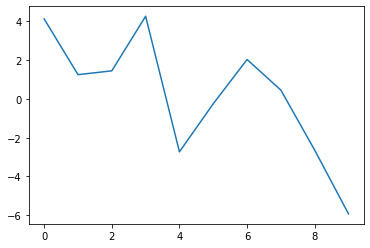

In [61]:
plt.plot(k_t["gercek-tahmin"])

#### Bölümün kodları




```
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/Data Science/Kendi Yazılarım/Advertising.csv")
dataset.drop("Unnamed: 0", inplace = True, axis =1)
df = dataset.copy()
df.isnull().values.any()
df.corr()
import seaborn as sns
sns.pairplot(df, kind="reg")
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")
# şimdi modellemey başlayalım :) stats kütüphanesi ile yapacağız
import statsmodels.api as sm
X = df[["TV"]] # bağımlı değişken
X = sm.add_constant(X) 
y = df["sales"]
lm = sm.OLS(y,X) 
model = lm.fit()
model.summary()
```



```
# statsmodels.api ile görmüştük. Birde statsmodels.formula.api ile görelim
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()
g = sns. regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color":"r","s":9})
g.set_title("Model Denklemi: Sales 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları") 
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0)
```



```
from sklearn.linear_model import LinearRegression
from pandas.core.internals.managers import libinternals
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
```





## Çoklu  Doğrusal Regresyon (Multi-Linear Regression)

### Teori

Temel amaç, bağımlı ve bağımsız değşkenLER arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. Basit Doğrusal Regresyondan farkı, birden fazla bağımız değişken olmasıdır. Yine hata kareler toplamı (mse) gibi değerleri optimize etme en büyük çabamız.

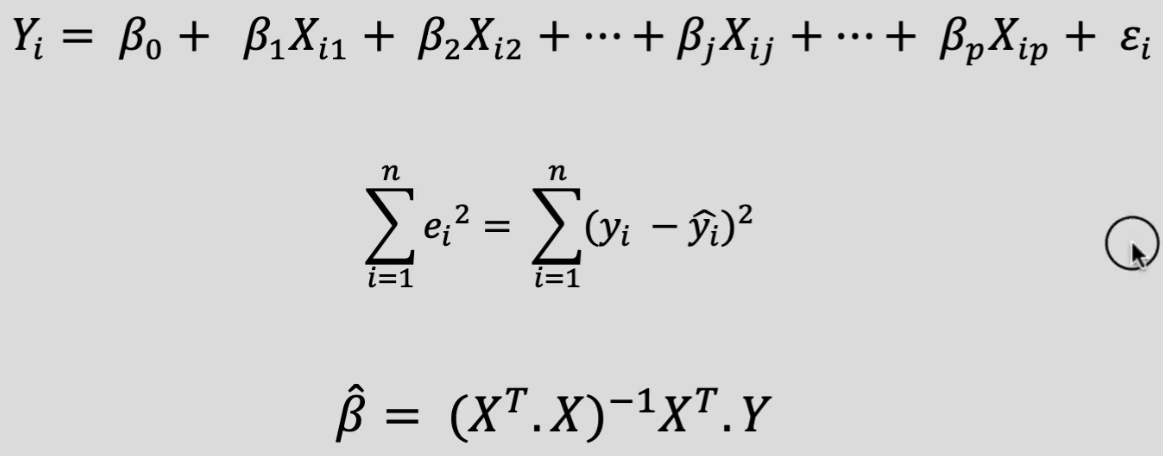

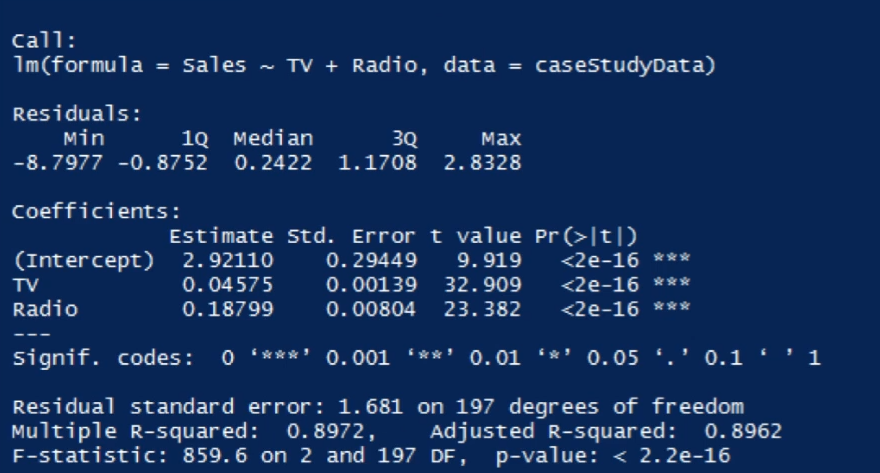

**Doğrusal Regresyonun Varsayımları:**
* Hatalar(gerçek_degeler - tahmin_edilen_degerler) normal dağılır.
* Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur. (Hatırlarsan önceki veri setinde TV ile radyo arasında korelasyon olup olmadığına bakmıştık. Eğer varsa sıkıntıydı. Burada kastedilen de bu.)
* Her bir gözlem için hata terimleri varyansları sabittir.
* Değişkenler ile hata terimi arasında ilişki yoktur.
* Bağımsız değişkenler arasında çoklı doğrusal ilişki problemi yoktur.

İşte bu varsayımlardan kaynaklı ortaya çıkan hatalardan ötürü farklı farklı regresyon türleri ortaya çıkmıştır. Eğer hata çıkmıyor ise elimizdeki en iyi regresyon MLR(Multi Linear Regression) olur. Hata çıkarsa diğerlerine bakarız. Tüyo: Gerçek hayatta çok kullanımı ya da kullanıldıktan sonra sonuçları dikkate fazla alınmaz. Çünkü gerçek hayatta bağımsız değişkenler arasında illa bir yerde korelasyon çıkıyor.
Not: Bağımsız değişkenler arası otokorelason sorununu çözmek için PCR(Principl Component Regression) metodu ortaya çıkmıştır.

**Regresyon modellerinin avantajları ve dezavantajları:**
* İyi anlaşılırsa diğer tüm ML ve DL konuları çok daha rahat kavranır (+) (Doğrusal reg ve Lojistik reg, makine öğrenmesinin temelini oluşturur. Artıklar çok iyi anlaşılmalıdır.)
* Doğruallık nedenselli yorumları yapılabilmesini sağlar, bu durum aksiyonel ve stratejik modeleme imkanı verir.(+)
* Değişkenlerin etki düzeyleri ve anlamlılıkarı değerlendirilebilir.(+)
* Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir. r2(+)
* Model anlamlılığı değerlendirilebilir.(+)
* Varsayımları vardır.(-/+)
* Aykırı gözlemlere duyarlıdır.(-)

### Uygulama

#### 1. Model

In [63]:
ad = pd.read_csv("/content/drive/MyDrive/Data Science/Kendi Yazılarım/Advertising.csv", usecols=[1,2,3,4])

In [64]:
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Burada veri setimizi artık _test_ ve _train_ olarak ayırmaya başlıyoruz.

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [66]:
X = df.drop("sales", axis =1) # bağımsız değişkenleri seçtik
y = df["sales"]


X_train, X_test, y_train, y_test = train_test_split(X,  # bağımsız değişkenler
                                                    y,  # bağımlı değişken
                                                    test_size=0.20,   #%20 test, %80 train
                                                    random_state=41)  # karıştırdıktan sonra elde edilen halin id'si 41, kaybolmaması ya da her seferinde yeni bir veri seti şeklinde gelmemesi için

In [67]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (160, 3), X_test: (40, 3), y_train: (160,), y_test: (40,)


In [68]:
# ihtiyaç olursa diye veri setimizin ilk halini bir yerde tutalım
training = df.copy()

In [69]:
## STATSMODELS ile model kurma
lm = sm.OLS(y_train,X_train)

In [70]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3198.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):                   1.73e-140
Time:                        20:21:44   Log-Likelihood:                         -330.71
No. Observations:                 160   AIC:                                      667.4
Df Residuals:                     157   BIC:                                      676.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0539      0.001     38.820      0.000       0.051       0.057
radio          0.2268      0.010     22.263      0.000       0.207       0.247
newspaper      0.0117      0.007      1.589      0.114      -0.003       0.026
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.201
Skew:                           0.053   Prob(JB):                        0.904
Kurtosis:                       3.138   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F istatistiği modelin anlamlılığını ;r2 ise değişkenlerin değişkenlik seviyesini, varyansı belirtirdi. <br> <br>
Model doğrulama: validasyon yöntemleriydi. <br>
Tahmin başarısı: mse-rmse değerleri çıktıalrıydı

In [73]:
#modelin üstünden bazı çıktılara erişelim
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0539,0.001,38.820,0.000,0.051,0.057
radio,0.2268,0.010,22.263,0.000,0.207,0.247
newspaper,0.0117,0.007,1.589,0.114,-0.003,0.026


In [74]:
## SKLEARN ile model kurma
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [75]:
model.intercept_

2.7888984470444047

In [76]:
model.coef_

array([ 0.04604721,  0.19548316, -0.00388396])

#### 2. Tahmin

Model Denklemimiz: <br>
Sales = 2.78 + TV0.04604721 + Radio0.19548316 + NewsPaper-0.00388396 <br>
Örn: 30 birim TV, 10 birim radio, 40 gazate harcaması olduğunda satışların tahmini değeri ne olur?

In [79]:
yeni_veri = pd.DataFrame([[30],[10],[40]]).T # kolon değilde satır eklemek için
model.predict(yeni_veri)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.96978772])

Yukarıdaki değer, verilen değerlere göre arttırma işlemi yapılınca "sales" değişkenindeki değişimi veriyor. Peki bu modelin tahmin başarısı ne kadar? Hadi bunu ölçelim:

In [82]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
# buradan dönen sonuç bizim EĞİTİM HATAMIZDIR.
rmse

1.6083727014444487

In [83]:
# test hatamızıda bulalım:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
#buradan dönen hata da biim TEST Hatamız olacak.
rmse

1.9057489115676043

#### 3.Model Tunning

Burada model tunnini model doğrulama olarak ele alacağız. Çoklu regresyonda, random state'i değiştirerek veri setini shuffle'larız. Sürekli shuffle'layarakta en optimumu bulmaya çalışırız. <br>
Burada veri seti karıştırma yerine modeli doğrulamak çok daha iyi bir fikirdir. K-fold kullanacağız.

In [85]:
X = df.drop("sales", axis =1) # bağımsız değişkenleri seçtik
y = df["sales"]


X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y,  
                                                    test_size=0.20,   
                                                    random_state=42)  
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [86]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.644727765644337

In [87]:
model.score(X_train,y_train) #r2 değeriydi bu

0.8957008271017818

In [88]:
cross_val_score(model,   # modelimiz
                X,      #bağımsız değişkenler
                y,      # bağımlı değişken
                cv =10, # eğitim veri setinin bölüneceği parça sayısı
                scoring = "r2" # score tipi olarak bağımsız değişkenin bağımlı değişkeni tanımlamasını seçelim
                )

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

In [89]:
cross_val_score(model, X, y, cv =10, scoring = "r2").mean() # modelimizin doğrulanmış r2 değeri budur

0.8853562237979616

In [90]:
cross_val_score(model, X_train, y_train, cv =10, scoring = "r2").mean() # eğitm seti üzerinden yapmayı unutma!

0.7913548596916338

In [97]:
-cross_val_score(model, X_train, y_train, cv =10, scoring = "neg_mean_squared_error").mean() # doğrulanmış mse değeri, -'ye takılma adamlar fonksiyonu böyle yazmış

2.9587701386797574

In [95]:
mean_squared_error(y_train,model.predict(X_train))

2.705129423081414

In [99]:
# yukarıda epitim hatalarına baktık, şimdi de test hatalarına bakalım.
print("Valide edilmemiş test hatamız: ",np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
print("Valiede edilmiş test hatamız: ",np.sqrt(-cross_val_score(model, X_test, y_test, cv =10, scoring = "neg_mean_squared_error")).mean())

Valide edilmemiş test hatamız:  1.78159966153345
Valiede edilmiş test hatamız:  1.8462778823997095
